In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from scipy.stats import norm

In [3]:
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")


In [5]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [12]:
cats=df.select_dtypes(include="object")
nums=df.select_dtypes(include="number")

<AxesSubplot:>

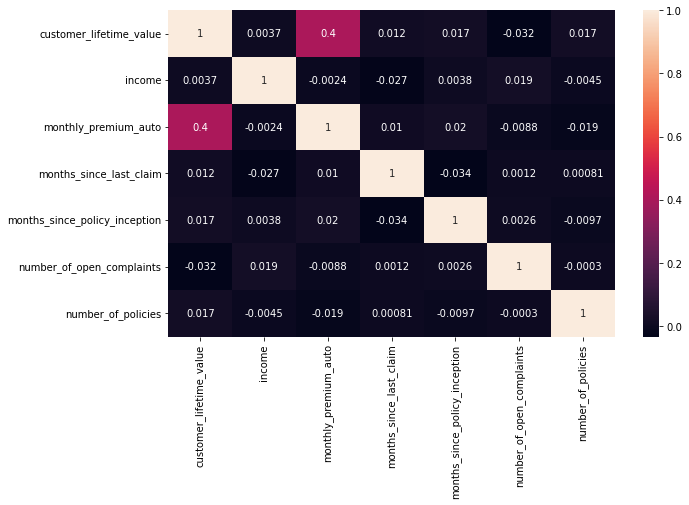

In [10]:
heatfig=plt.figure(figsize=(10,6))
sns.heatmap(df.drop("total_claim_amount",axis=1).corr(),annot=True)

In [11]:
#It seems there are no highly correlated values. I won't drop any column.

In [13]:
cats

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [14]:
pd.get_dummies(cats)

,region_central,region_east,region_north west,region_west region,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,education_bachelor,...,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,0,1,1,...,1,0,1,0,0,0,0,0,1,0
10685,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10686,1,0,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
10687,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
#Let's try with the onehotencoder
encoder=OneHotEncoder()


In [15]:
nums

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [28]:
# I'm choosing customer_lifetime_value as mu varB as it has a lot of skew (Hale til højre)
#I'm also using months_since_policy_inception as varA as it has a large range of values

<AxesSubplot:xlabel='months_since_policy_inception', ylabel='Count'>

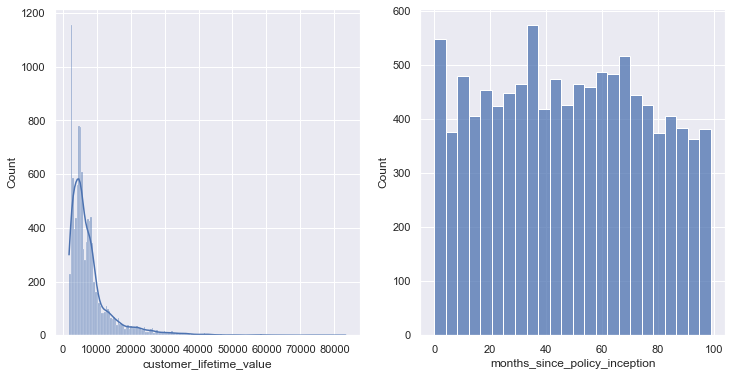

In [35]:
fig1, axes=plt.subplots(1,2,figsize=(12,6))

sns.histplot(x="customer_lifetime_value",kde=True,data=nums,ax=axes[0])
sns.histplot(x="months_since_policy_inception",data=nums,ax=axes[1])

###### Alriiiight here is when we turn off our brains and do what Google says. Firstly, I convert my column "months_since_policy_inception" into a numpy array, because our function, MinMaxScaler for some reason doesn't understand a dataframe/Series as input. So we use values.reshape to make it into numpy array. If you wanna see how it works, try playing around with outputting just the column and afterwards the variable x. Then you can see the difference it made. 

Thereafter we declare the variable "scaler", which essentially is just our function MinMaxScaler. Not strictly important, but makes the code more clean.

In the next cell we make a array called months_scaled, and we basically just use our scaler, meaning the MinMaxScaler function to 'transform' our column. 

We now have the scaled column as we want, and we replace the old "months_since_policy_inception" with the new one.


##### I won't comment further down , as the procedure is the exact same, just with another function, StandardScaler

In [93]:
x = nums['months_since_policy_inception'].values.reshape(-1, 1)

scaler= MinMaxScaler()


In [43]:
months_scaled=scaler.fit_transform(x)

In [45]:
nums['months_since_policy_inception']=months_scaled

In [46]:
nums

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,0.525253,0,9,292
1,2228,92260,64,3,0.262626,0,1,744
2,14947,22139,100,34,0.313131,0,2,480
3,22332,49078,97,10,0.030303,0,2,484
4,9025,23675,117,33,0.313131,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,0.404040,0,7,1214
10685,5259,61146,65,7,0.686869,0,6,273
10686,23893,39837,201,11,0.636364,0,2,381
10687,11971,64195,158,0,0.272727,4,6,618


<AxesSubplot:xlabel='months_since_policy_inception', ylabel='Count'>

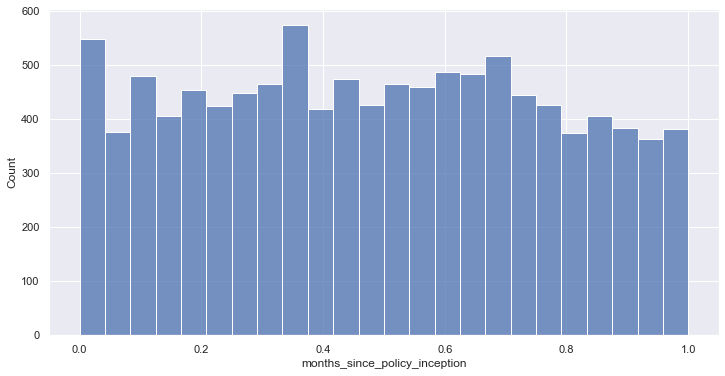

In [51]:
fig2, axes2=plt.subplots(1,1,figsize=(12,6))

sns.histplot(x="months_since_policy_inception",data=nums)

As we can se above, the column has been scaled so all values are between 0 and one. 
Notice how the actual shape of the histogram hasn't really changed.

Use StandardScalar or PowerTransform to reduce the skew and standardize varB's distribution.
Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

In [54]:
x_cust = nums['customer_lifetime_value'].values.reshape(-1, 1)

scaler2= StandardScaler()

In [57]:
cust_stand=scaler2.fit_transform(x_cust)

In [70]:
nums["customer_lifetime_value"]=cust_stand
nums

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-0.465726,48029,61,7,0.525253,0,9,292
1,-0.841022,92260,64,3,0.262626,0,1,744
2,1.008413,22139,100,34,0.313131,0,2,480
3,2.082245,49078,97,10,0.030303,0,2,484
4,0.147311,23675,117,33,0.313131,0,7,707
...,...,...,...,...,...,...,...,...
10684,1.097984,61541,253,12,0.404040,0,7,1214
10685,-0.400293,61146,65,7,0.686869,0,6,273
10686,2.309226,39837,201,11,0.636364,0,2,381
10687,0.575681,64195,158,0,0.272727,4,6,618


In [88]:
nums.customer_lifetime_value.var()

1.000093562874248

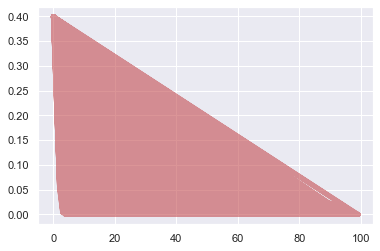

In [66]:
fig3, axes3 = plt.subplots(1, 1)

x3 = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

axes3.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

This is supposed to be the probability density function. Not that the code makes sense, but cool.

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Count'>

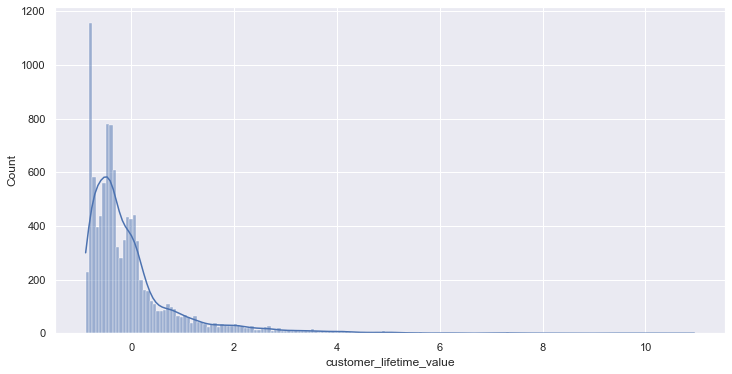

In [89]:
fig5, axes5=plt.subplots(1,1,figsize=(12,6))

sns.histplot(x="customer_lifetime_value",kde=True,data=nums)